1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

N = 1000

x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})


cov_matrix = np.cov([x1, x2, x3])

print("\nEGEINDECOMPOSITION\n")
#EGEINDECOMPOSITION
eigenvalues_dec, eigenvectors_dec = np.linalg.eig(cov_matrix)
print("Eigenvalues from EIGENDECOMPOSITION:")
print(eigenvalues_dec)
print("\nEigenvectors from EIGENDECOMPOSITION:")
print(eigenvectors_dec)

print("\nSVD\n")
#SVD
U, Sigma, VT = np.linalg.svd(cov_matrix)
eigenvalues_svd = Sigma ** 2 / (N - 1)
eigenvectors_svd = U.copy()
eigenvectors_svd[:, 1], eigenvectors_svd[:, 2] = eigenvectors_svd[:, 2].copy(), eigenvectors_svd[:, 1].copy()
print("Eigenvalues from SVD:")
print(eigenvalues_svd)
print("\nEigenvectors from SVD:")
print(U)

print("\nDIFFERENCES\n")
# Check if the results are similar
eigenvalues_difference = np.abs(eigenvalues_dec - eigenvalues_svd)
eigenvectors_difference = np.abs(np.abs(eigenvectors_dec) - np.abs(eigenvectors_svd))
print("\nEigenvalues Difference:")
print(eigenvalues_difference)
diff_eigvalues= np.all(np.abs(eigenvectors_difference) < 1e-10)
print("Same result ?", diff_eigvalues)
print("\nEigenvectors Difference:")
print(eigenvectors_difference)
diff_eigvectors = np.all(np.abs(eigenvectors_difference) < 1e-10)
print("Same result ?", diff_eigvectors)



EGEINDECOMPOSITION

Eigenvalues from EIGENDECOMPOSITION:
[ 2.68171936e+01 -1.07649589e-16  2.10711195e+00]

Eigenvectors from EIGENDECOMPOSITION:
[[-0.11561671 -0.81649658  0.56565547]
 [-0.57716693 -0.40824829 -0.70725644]
 [-0.80840034  0.40824829  0.4240545 ]]

SVD

Eigenvalues from SVD:
[7.19881753e-01 4.44436515e-03 2.86503958e-34]

Eigenvectors from SVD:
[[-0.11561671  0.56565547 -0.81649658]
 [-0.57716693 -0.70725644 -0.40824829]
 [-0.80840034  0.4240545   0.40824829]]

DIFFERENCES


Eigenvalues Difference:
[2.60973118e+01 4.44436515e-03 2.10711195e+00]
Same result ? True

Eigenvectors Difference:
[[6.93889390e-17 4.44089210e-16 8.88178420e-16]
 [0.00000000e+00 2.77555756e-16 4.44089210e-16]
 [1.11022302e-16 2.77555756e-16 6.10622664e-16]]
Same result ? True


In [69]:
total_variability = np.sum(eigenvalues_svd)
explained_variability_percent = (eigenvalues_svd / total_variability) * 100
print("Proportion of variability by each Component:")
for i, explained_percent in enumerate(explained_variability_percent):
    print(f"Principal Component {i+1}: {explained_percent:.2f}%")
    
print("This is logical because x2 and x3 are depends on x1 and x3 depends also on x2\n")


exp_var_ratio_svd = eigenvalues_svd / total_variability
cum_exp_var_svd = np.cumsum(exp_var_ratio_svd)

num_components_svd = np.argmax(cum_exp_var_svd >= 0.99) + 1

print("Number of components needed for 99% variability :", num_components_svd)

selected_components_svd = U[:, :num_components_svd]
data_reduced_svd = np.dot(data.values, selected_components_svd)
data_reduced_svd = pd.DataFrame(data_reduced_svd, columns=[f'PC{i+1}' for i in range(num_components_svd)])

print("\nReduced Data (SVD):")
print(data_reduced_svd.head())

Proportion of Variability Explained by Each Principal Component:
Principal Component 1: 99.39%
Principal Component 2: 0.61%
Principal Component 3: 0.00%
This is logical because x2 and x3 are depends on x1 and x3 depends also on x2

Number of components needed for 99% variability : 1

Reduced Data (SVD):
         PC1
0  -3.059540
1 -12.316135
2  -1.514876
3   1.014955
4   2.940918



Redefined Data (SVD):
         x1        x2        x3
0  0.353734  1.765865  2.473333
1  1.423951  7.108466  9.956367
2  0.175145  0.874336  1.224626
3 -0.117346 -0.585798 -0.820490
4 -0.340019 -1.697400 -2.377439


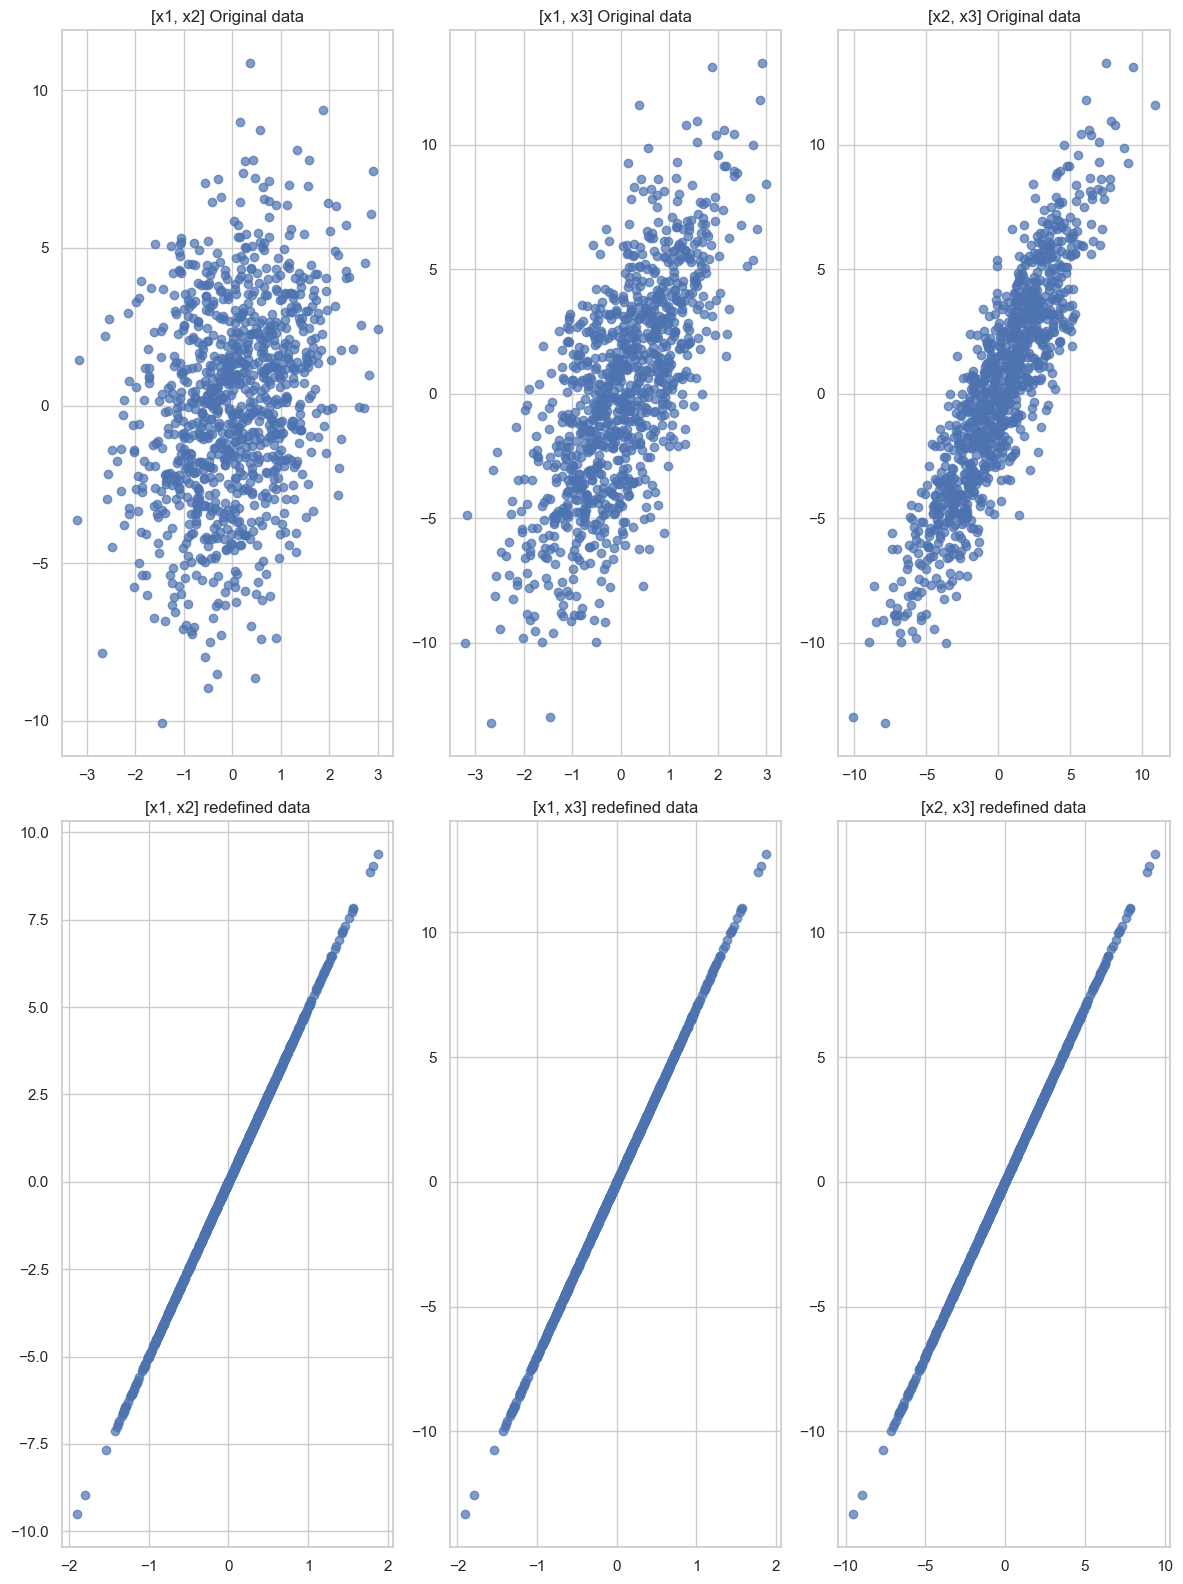

In [74]:
data_redefined_svd = np.dot(data_reduced_svd.values, selected_components_svd.T)
data_redefined_svd = pd.DataFrame(data_redefined_svd, columns=data.columns)

print("\nRedefined Data (SVD):")
print(data_redefined_svd.head())

plt.figure(figsize=(12, 16))
plt.subplot(2, 3, 1)
plt.scatter(data['x1'], data['x2'], alpha=0.7)
plt.title('[x1, x2] Original data')
plt.subplot(2, 3, 2)
plt.scatter(data['x1'], data['x3'], alpha=0.7)
plt.title('[x1, x3] Original data')
plt.subplot(2, 3, 3)
plt.scatter(data['x2'], data['x3'], alpha=0.7)
plt.title('[x2, x3] Original data')

plt.subplot(2, 3, 4)
plt.scatter(data_redefined_svd['x1'], data_redefined_svd['x2'], alpha=0.7)
plt.title('[x1, x2] redefined data')
plt.subplot(2, 3, 5)
plt.scatter(data_redefined_svd['x1'], data_redefined_svd['x3'], alpha=0.7)
plt.title('[x1, x3] redefined data')
plt.subplot(2, 3, 6)
plt.scatter(data_redefined_svd['x2'], data_redefined_svd['x3'], alpha=0.7)
plt.title('[x2, x3] redefined data')


plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [98]:
from sklearn.decomposition import PCA

noise_features = np.random.normal(0, 0.05, size=(N, 10))
data = _
data = pd.concat([data, pd.DataFrame(noise_features, columns=[f'noise_{i}' for i in range(10)])], axis=1)
cov_matrix_noisy = np.cov(data_noisy, rowvar=False)

pca_noisy = PCA()
pca_noisy.fit(data_noisy)


print("\nEGEINDECOMPOSITION\n")
#EGEINDECOMPOSITION
eigenvalues_dec, eigenvectors_dec = np.linalg.eig(cov_matrix_noisy)
print("Eigenvalues from EIGENDECOMPOSITION:")
print(eigenvalues_dec)
print("\nEigenvectors from EIGENDECOMPOSITION:")
print(eigenvectors_dec)

print("\nSVD\n")
#SVD
U, Sigma, VT = np.linalg.svd(cov_matrix_noisy)
eigenvalues_svd = Sigma ** 2 / (N - 1)
print("Eigenvalues from SVD:")
print(eigenvalues_svd)
print("\nEigenvectors from SVD:")
print(U)

print("\nDIFFERENCES\n")
# Check if the results are similar
eigenvalues_difference = np.abs(eigenvalues_dec - eigenvalues_svd)
eigenvectors_difference = np.abs(np.abs(eigenvectors_dec) - np.abs(eigenvectors_svd))
print("\nEigenvalues Difference:")
print(eigenvalues_difference)
diff_eigvalues= np.all(np.abs(eigenvectors_difference) < 1e-10)
print("Same result ?", diff_eigvalues)
print("\nEigenvectors Difference:")
print(eigenvectors_difference)
diff_eigvectors = np.all(np.abs(eigenvectors_difference) < 1e-10)
print("Same result ?", diff_eigvectors)

print("\nThis time results are not the same\n")


total_variability = np.sum(eigenvalues_svd)
explained_variability_percent = (eigenvalues_svd / total_variability) * 100
print("Proportion of variability by each Component:")
for i, explained_percent in enumerate(explained_variability_percent):
    print(f"Principal Component {i+1}: {explained_percent:.2f}%")


exp_var_ratio_svd = eigenvalues_svd / total_variability
cum_exp_var_svd = np.cumsum(exp_var_ratio_svd)

num_components_svd = np.argmax(cum_exp_var_svd >= 0.99) + 1

print("Number of components needed for 99% variability :", num_components_svd)





EGEINDECOMPOSITION

Eigenvalues from EIGENDECOMPOSITION:
[ 2.77093310e+01  1.88799068e+00 -2.19962653e-15  2.92226601e-03
  2.10065748e-03  2.17921150e-03  2.78445608e-03  2.38082303e-03
  2.42371978e-03  2.50752844e-03  2.58596177e-03  2.60797223e-03
  2.65739835e-03]

Eigenvectors from EIGENDECOMPOSITION:
[[-1.09985944e-01 -5.66774674e-01 -8.16496581e-01  1.03992945e-03
  -1.96494768e-04 -1.20211991e-04  4.02201727e-04 -1.07797413e-04
   9.61754506e-04 -1.61081131e-04 -5.73015814e-04  5.52236605e-04
   5.24091474e-05]
 [-5.84171390e-01  7.01478848e-01 -4.08248290e-01 -1.29908877e-03
   1.32683853e-04  2.21234631e-04 -3.77521236e-04  4.46522744e-04
  -1.09245124e-03  4.11085262e-04  6.97297736e-04 -7.13635203e-04
  -3.03989199e-04]
 [-8.04143278e-01 -4.32070499e-01  4.08248290e-01  7.80770140e-04
  -2.60305683e-04 -1.91893514e-05  4.26882217e-04  2.30927917e-04
   8.31057768e-04  8.89229987e-05 -4.48733892e-04  3.90838006e-04
  -1.99170905e-04]
 [-2.71019801e-04 -8.89339077e-04 -1.26


Reduced Data (SVD):
        PC1
0 -7.371328
1 -3.421576
2 -2.260468
3 -2.036985
4 -2.180618

Redefined Data (SVD):
         x1        x2        x3   noise_0   noise_1   noise_2   noise_3  \
0  0.810742  4.306119  5.927603  0.001998  0.001662  0.001808  0.002073   
1  0.376325  1.998787  2.751437  0.000927  0.000772  0.000839  0.000962   
2  0.248620  1.320501  1.817740  0.000613  0.000510  0.000555  0.000636   
3  0.224040  1.189948  1.638028  0.000552  0.000459  0.000500  0.000573   
4  0.239837  1.273854  1.753529  0.000591  0.000492  0.000535  0.000613   

    noise_4   noise_5   noise_6   noise_7   noise_8   noise_9  
0 -0.001613  0.000831  0.001561  0.001051  0.001638  0.001260  
1 -0.000749  0.000386  0.000724  0.000488  0.000760  0.000585  
2 -0.000495  0.000255  0.000479  0.000322  0.000502  0.000386  
3 -0.000446  0.000230  0.000431  0.000290  0.000453  0.000348  
4 -0.000477  0.000246  0.000462  0.000311  0.000484  0.000373  


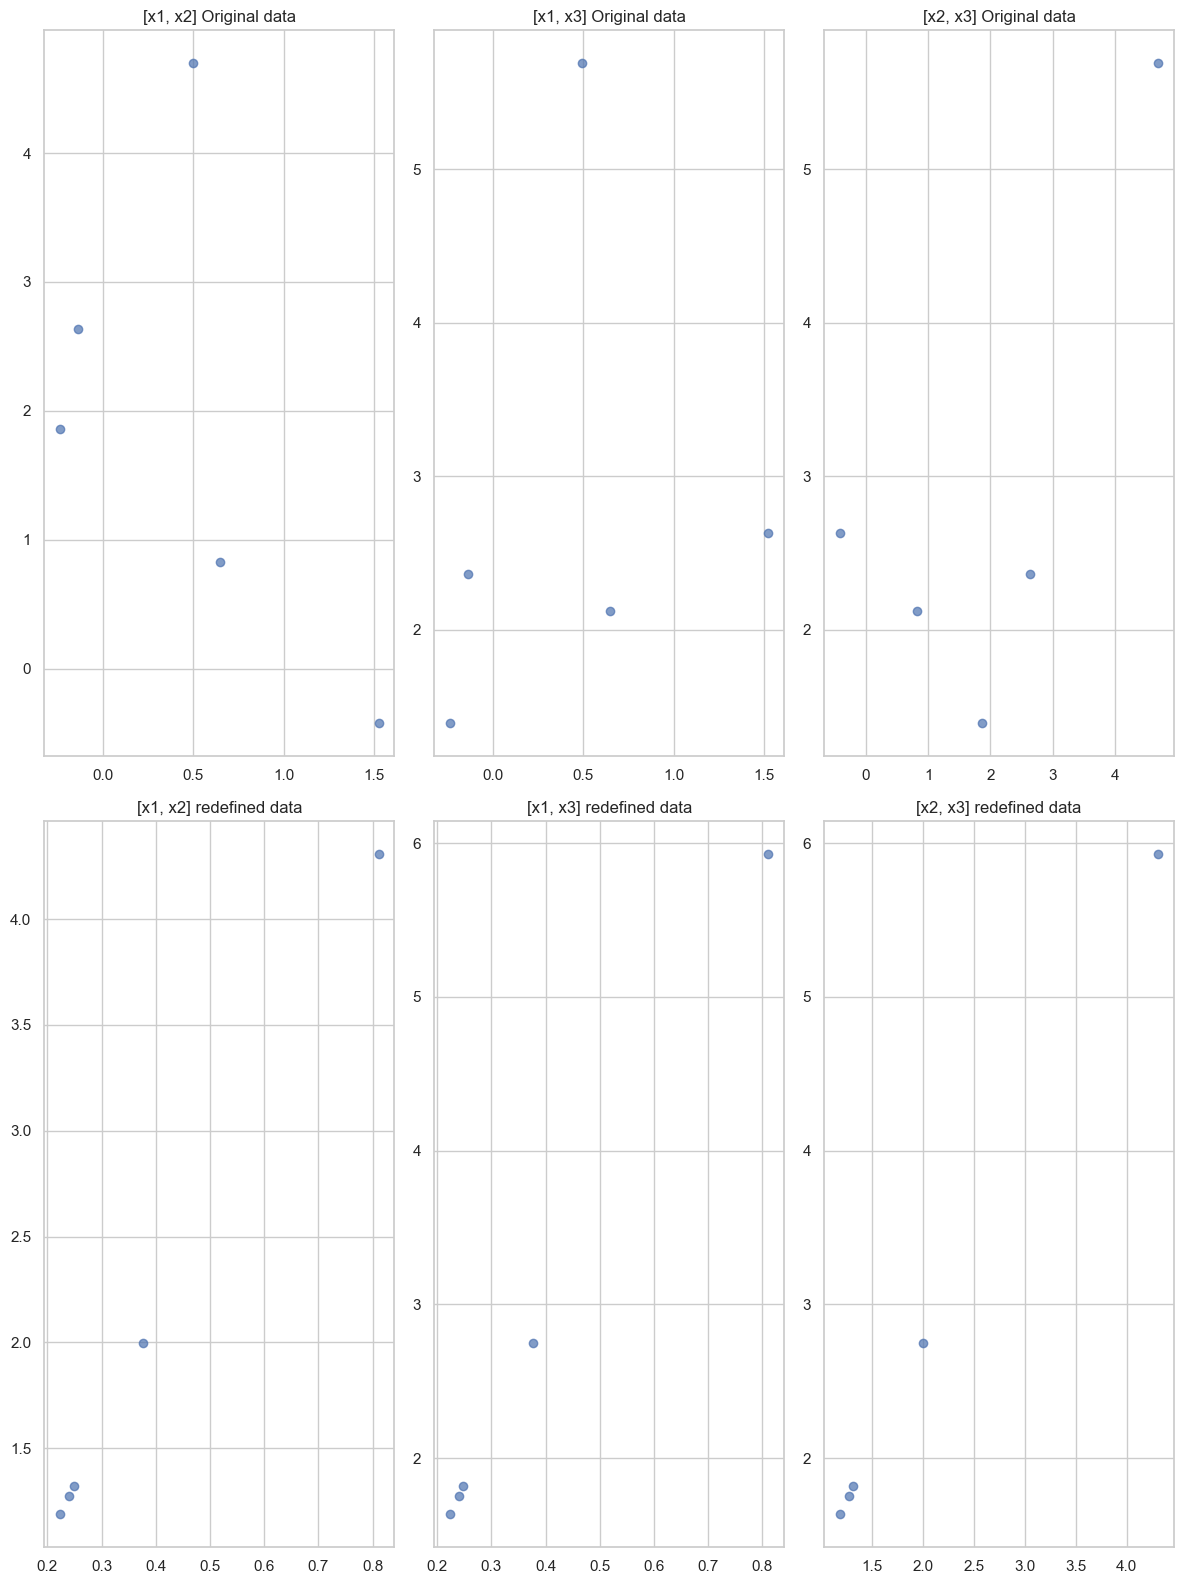

In [100]:
selected_components_svd = U[:, :num_components_svd]
data_reduced_svd = np.dot(data.values, selected_components_svd)
data_reduced_svd = pd.DataFrame(data_reduced_svd, columns=[f'PC{i+1}' for i in range(num_components_svd)])

print("\nReduced Data (SVD):")
print(data_reduced_svd.head())

data_redefined_svd = np.dot(data_reduced_svd.values, selected_components_svd.T)
data_redefined_svd = pd.DataFrame(data_redefined_svd, columns=data.columns)

print("\nRedefined Data (SVD):")
print(data_redefined_svd.head())

plt.figure(figsize=(12, 16))
plt.subplot(2, 3, 1)
plt.scatter(data['x1'], data['x2'], alpha=0.7)
plt.title('[x1, x2] Original data')
plt.subplot(2, 3, 2)
plt.scatter(data['x1'], data['x3'], alpha=0.7)
plt.title('[x1, x3] Original data')
plt.subplot(2, 3, 3)
plt.scatter(data['x2'], data['x3'], alpha=0.7)
plt.title('[x2, x3] Original data')

plt.subplot(2, 3, 4)
plt.scatter(data_redefined_svd['x1'], data_redefined_svd['x2'], alpha=0.7)
plt.title('[x1, x2] redefined data')
plt.subplot(2, 3, 5)
plt.scatter(data_redefined_svd['x1'], data_redefined_svd['x3'], alpha=0.7)
plt.title('[x1, x3] redefined data')
plt.subplot(2, 3, 6)
plt.scatter(data_redefined_svd['x2'], data_redefined_svd['x3'], alpha=0.7)
plt.title('[x2, x3] redefined data')


plt.tight_layout()
plt.show()


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 